In [1]:
import sqlite3
import pandas as pd

In [2]:
conn = sqlite3.connect('database.db')

In [17]:
Subjects = {
    'Экономика': 'economics',
    'Английский язык': 'english',
    'Немецкий язык': 'german',
    'ОБЖ': 'obzh',
    'Обществознание': 'social',
    'География': 'geography',
    'Французский язык': 'french',
    'Испанский язык': 'spanish'
}

# Данетки

In [48]:
yesno = pd.read_sql_query('SELECT * FROM "Задачи да/нет-ки"', conn)
yesno.columns

Index(['Номер задачи', 'Тело вопроса', 'Верный ответ', 'Предмет', 'Источник',
       'Можно в метро', 'Тема', 'Количество решений', 'Количество верных',
       'Есть ли картинка', 'Картинка', 'тип'],
      dtype='object')

In [49]:
yesno = yesno.rename(
    columns={
        'Номер задачи': 'question_id',
        'Тело вопроса': 'ask_text',
        'Верный ответ': 'right_answer',
        'Предмет': 'subject',
        'Источник': 'source',
        'Можно в метро': 'may_in_subway',
        'Тема': 'theme',
        'Количество решений': 'number_of_decisions',
        'Количество верных': 'number_of_correct_decisions',
        'Есть ли картинка': 'have_photo',
        'Картинка': 'photo_url'
    }
).drop(columns=['тип', 'question_id'])

yesno.index.names = ['question_id']

In [50]:
yesno.head(1)

,ask_text,right_answer,subject,source,may_in_subway,theme,number_of_decisions,number_of_correct_decisions,have_photo,photo_url
question_id,,,,,,,,,,
0,Если Вы вкладываете в банк на счёт $100 при ст...,0,Экономика,MOSH,1,mathematics,0,0,0,None


In [51]:
yesno.subject.unique()

array(['Экономика', 'Английский язык', 'Обществознание', 'Немецкий язык'],
      dtype=object)

In [52]:
yesno.subject = yesno.subject.apply(Subjects.__getitem__)

In [53]:
yesno.subject.unique()

array(['economics', 'english', 'social', 'german'], dtype=object)

### Очищаем данные

In [67]:
yesno.right_answer = yesno.right_answer.apply(lambda x: x if x != '=1' else 1)

### Расставляем в верном порядке

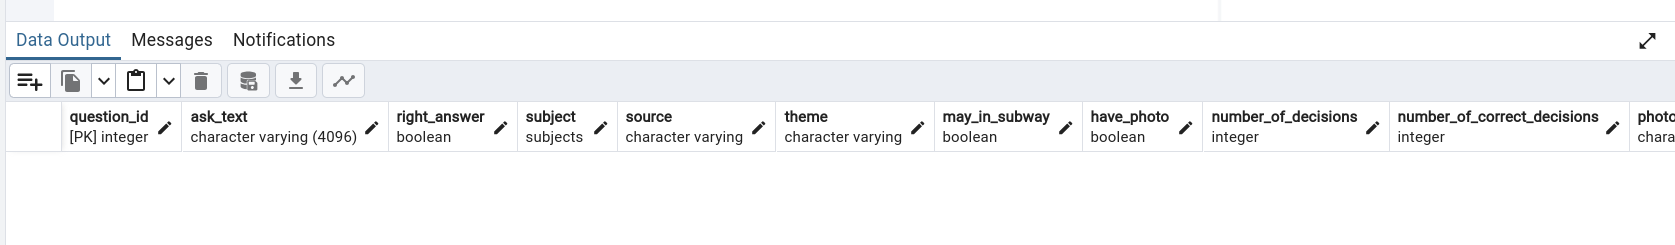

In [59]:
yesno = yesno[['ask_text', 'right_answer', 'subject', 'source', 'theme', 'may_in_subway', 'have_photo', 'number_of_decisions', 'number_of_correct_decisions', 'photo_url']]

In [68]:
yesno.to_csv('yesno.csv')

# Один верный ответ

In [4]:
one = pd.read_sql_query('SELECT * FROM "Задачи с одним вариантом ответа"', conn)


In [5]:
one.columns

Index(['Номер задачи', 'Тело вопроса', '1 вариант ответа', '2 вариант ответа',
       '3 вариант ответа', '4 вариант ответа', '5 вариант ответа',
       'Верный ответ', 'Предмет', 'Источник', 'Можно в метро', 'Тема',
       'Количество решений', 'Количество верных', 'Есть ли картинка', 'тип',
       'Картинка'],
      dtype='object')

In [6]:
one = one.rename(
    columns={
        'Номер задачи': 'question_id',
        'Тело вопроса': 'ask_text',
        '1 вариант ответа': 'answer_1',
        '2 вариант ответа': 'answer_2',
        '3 вариант ответа': 'answer_3',
        '4 вариант ответа': 'answer_4',
        '5 вариант ответа': 'answer_5',
        'Верный ответ': 'right_answer',
        'Предмет': 'subject',
        'Источник': 'source',
        'Можно в метро': 'may_in_subway',
        'Тема': 'theme',
        'Количество решений': 'number_of_decisions',
        'Количество верных': 'number_of_correct_decisions',
        'Есть ли картинка': 'have_photo',
        'Картинка': 'photo_url'
    }
).drop(columns=['тип'])

In [27]:
one['have_photo'] = one.photo_url.apply(lambda x: True if x == 1 else False)

/tmp/ipykernel_16834/3207795792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one['have_photo'] = one.photo_url.apply(lambda x: True if x == 1 else False)


In [29]:
one.have_photo.unique()

array([False,  True])

In [30]:
one.photo_url = [None] * one.shape[0]

/tmp/ipykernel_16834/3416979703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one.photo_url = [None] * one.shape[0]


In [18]:
one.subject = one.subject.apply(Subjects.__getitem__)

In [19]:
one.right_answer.unique()

array([  3,   0,   1,   4,   2, 123])

In [22]:
one = one[one.right_answer != 123]

In [51]:
one = one[(~one.answer_1.isna()) & (~one.answer_2.isna()) & (~one.answer_3.isna())& (~one.answer_4.isna())]

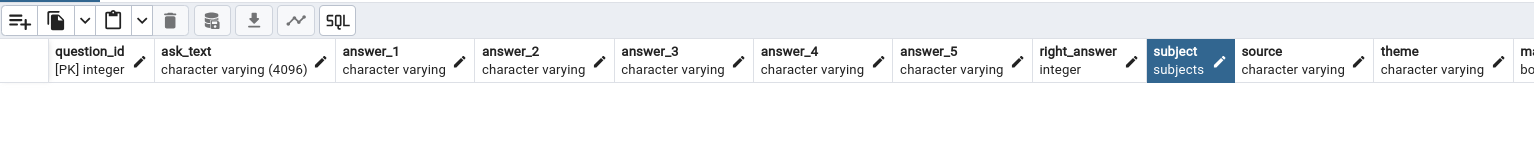

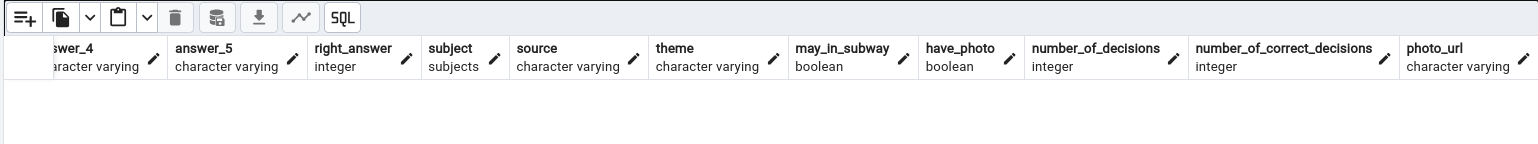

In [33]:
one = one[['question_id', 'ask_text', 'answer_1', 'answer_2', 'answer_3', 'answer_4', 'answer_5', 'right_answer', 'subject', 'source', 'theme', 'may_in_subway', 'have_photo', 'number_of_decisions', 'number_of_correct_decisions', 'photo_url']]

In [35]:
one.index = one.question_id

In [58]:
one = one[one.ask_text.apply(lambda t: len(t)) < 4096]

In [64]:
one = one[~one.theme.isna()]

In [66]:
one.shape

(8382, 16)

In [67]:
one.drop(columns=['question_id']).to_csv('one.csv')